In [1]:
import os
os.chdir('../..')

In [2]:
'''creat list of neighborhoods in LA city'''
from src.geoadmin import load_neighborhoods, load_cities

import geopandas as gpd

cities = load_cities().to_crs(4326)
hoods = load_neighborhoods()

assert hoods.crs == cities.crs, "CRS mismatch between neighborhoods and cities data"

lacity = cities.query('CITYNAME_ALF == "LOS ANGELES"')
hoodnames = gpd.sjoin(hoods.set_geometry(hoods.centroid.to_crs(epsg=4326)).set_crs(4326),
                         lacity[['geometry']],
                         predicate='intersects'
                         )['name'].tolist()
print(f'Found {len(hoodnames)} neighborhoods in LA city')

lacity_hoods = hoods[hoods['name'].isin(hoodnames)]

Found 122 neighborhoods in LA city


/var/folders/7b/rl6lkdns1dbfv_n3wwwmq8580000gn/T/ipykernel_6237/2954897241.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hoodnames = gpd.sjoin(hoods.set_geometry(hoods.centroid.to_crs(epsg=4326)).set_crs(4326),


In [4]:
landbase_years = [2013, 2017, 2021]  # get_landbase_layer to see what years are available
adp_years      = [2014, 2017, 2020]
lariac_years   = [2014, 2017, 2020]
region_gdf = lacity_hoods.iloc[[0]]

apd_data = []
for lb_yr, apd_yr, lar_yr in zip(landbase_years, adp_years, lariac_years):
    print(f'Processing year triplet: {lb_yr}, {apd_yr}, {lar_yr}')

    from src.geoadmin import load_data_by_year
    landbase_parcels, assessor_data, lariac_structures = load_data_by_year(
        region_gdf, lb_yr, apd_yr, lar_yr, "lariac"
        )
    print('Join assessor data with parcels polygons ')
    from src.geoadmin import merge_assessor_landbase
    apd = merge_assessor_landbase(assessor_data, landbase_parcels)
    apd_data.append(apd)


Processing year triplet: 2013, 2014, 2014


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC4_Buildings_2014.gdb': 'LARIAC4_BUILDINGS_2014' (default), 'LARIAC2_BUILDINGS_DELETED_2014'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'LARIAC4_Buildings_2014.gdb': 'LARIAC4_BUILDINGS_2014' (default), 'LARIAC2_BUILDINGS_DELETED_2014'. Specify layer parameter to avoid this warning.
  result = read_func(


Join assessor data with parcels polygons 
Processing year triplet: 2017, 2017, 2017


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/core.py:279: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read_info(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC5_Buildings_2017.gdb': 'LARIAC5_BUILDINGS_2017' (default), 'LARIAC4_BUILDINGS_DELETED_2017'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer

Join assessor data with parcels polygons 
Processing year triplet: 2021, 2020, 2020


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/core.py:279: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read_info(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC6_Buildings_2020.gdb': 'LARIAC6_BUILDINGS_2020' (default), 'LARIAC5_BUILDINGS_DELETED_2020'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer

Join assessor data with parcels polygons 


In [5]:
import pandas as pd
apd_data = pd.concat(apd_data, ignore_index=True)

<Axes: >

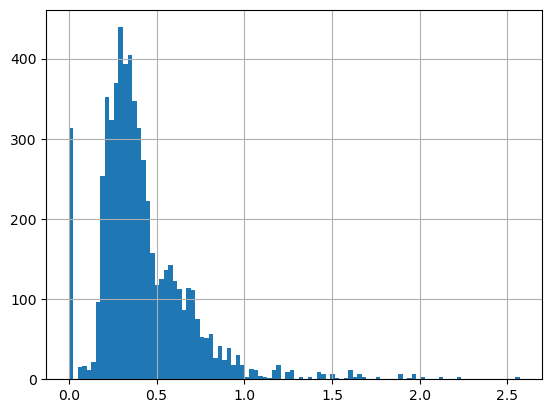

In [9]:
apd_data['FAR'].hist(bins = 100)

<Axes: >

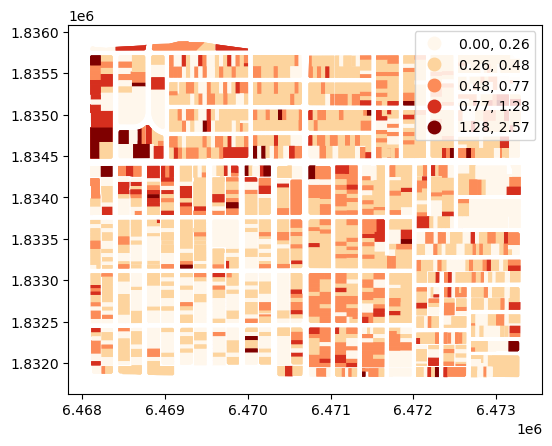

In [12]:
apd_data.plot('FAR', scheme = 'naturalbreaks', cmap = 'OrRd', legend = True)


In [ ]:
import